<a href="https://colab.research.google.com/github/junhaeng12/LGvsDOO/blob/main/4%EC%A1%B0_%EC%9E%A0%EC%8B%A4%EC%9D%98_%EC%A3%BC%EC%9D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : LG VS 두산 잠실의 주인은 누구인가?  
2015년부터 2021년까지의 데이터분석을 통한 LG트윈스 두산베어스 구단 비교분석  

가설 
LG가 잠실의 주인이다
TRUE 1을 COUNT해 그 수가 과반이 넘을 경우, 가설 채택 
그렇지 않을 경우, 가설 기각 = "두산이 잠실의 주인이다" 채택 

검증 변수 
1.	(LG-두산을 제외한) 잠실(홈)에서의 승률: LG 승률 > 두산의 승률 T / F
    * KBO는 2011년부터 승률 게산 방식에서 무승부를 카운팅하지 않는다. 즉 승률은 
승수 / 전체경기수 - 무승부 경기 수 가 된다.  


2.	(LG VS 두산) 잠실에서의 승수: LG 승수 > 두산의 승수 T / F
3.	잠실에서의 관중수: LG 관중수 > 두산의 관중수 T / F
4.	잠실에서의 우천경기시 관중수 (팬 결집도, 충성도 측정): LG 관중수 > 두산의 관중수 T / F
5.	올스타 맴버 수: LG > 두산

검증 결과 
5 항목 (혹은 7항목)의 True 값을 count 해서 절반 이상의 ex. T: 3, F: 2 결과인 경우 가설을 채택  

## (LG-두산을 제외한) 잠실(홈)에서의 승률: LG 승률 > 두산의 승률 T / F

In [ ]:
import numpy as np
import pandas as pd
import time 
import requests 
from bs4 import BeautifulSoup  

In [ ]:
# 1번 조건에 대한 두산 데이터 집합 
# 두산의 2015-2021 row data 크롤링 
info = {
    'Referer': 'http://old.statiz.co.kr/team.php?opt=0&sopt=1&year=2015&team=%EB%91%90%EC%82%B0',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36'
}
df_D_row = pd.DataFrame()
for season in range(2015, 2022):
    url = f'http://old.statiz.co.kr/team.php?opt=0&sopt=1&year={season}&team=%EB%91%90%EC%82%B0'

    df_temp = pd.read_html(url, header=1)[0]
    df_temp['연도'] = season
    df_temp['홈팀'] = '두산'
    df_D_row = pd.concat([df_D_row, df_temp], ignore_index=True)
#df_D_row


#정규, 잠실, LG 제외 
df_D_home_Lx = df_D_row[(df_D_row['시즌']=='정규') & (df_D_row['구장']=='잠실') & (df_D_row['상대팀']!='LG')]
df_D_home_Lx

,시즌,날짜,시간,구장,팀 선발,T,결과,상대팀,상대선발,T.1,승리투수,패전투수,세이브,관중,성적,연도,홈팀
0,정규,03-28,14시,잠실,마야,R,W 9:4,NC,찰리,R,마야,임정호,NaN,21746.0,1-0-0,2015,두산
1,정규,03-29,14시,잠실,장원준,L,W 4:1,NC,손민한,R,장원준,손민한,윤명준,15814.0,2-0-0,2015,두산
8,정규,04-07,18시30분,잠실,유희관,L,L 4:17,넥센,피어밴드,L,피어밴드,유희관,NaN,8038.0,3-4-0,2015,두산
9,정규,04-08,18시30분,잠실,진야곱,L,W 9:4,넥센,김대우,RU,진야곱,김대우,NaN,7962.0,4-4-0,2015,두산
10,정규,04-09,18시30분,잠실,마야,R,W 1:0,넥센,밴헤켄,L,마야,밴헤켄,NaN,8226.0,5-4-0,2015,두산
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,정규,10-17,17시,잠실,현도훈,R,W 5:2,KIA,윤중현,NaN,이현승,윤중현,이영하,NaN,65-62-6,2021,두산
1151,정규,10-26,18시30분,잠실,최원준,R,W 7:2,키움,최원태,R,이현승,최원태,NaN,2293.0,68-64-8,2021,두산
1156,정규,11-01,18시30분,잠실,곽빈,NaN,L 4:7,키움,안우진,NaN,조상우,김강률,NaN,12422.0,71-66-8,2021,두산
1157,정규,11-02,18시30분,잠실,김민규,NaN,W 16:8,키움,정찬헌,R,이영하,정찬헌,NaN,9425.0,72-66-8,2021,두산


In [ ]:
# 1번 조건에 대한 LG 데이터 집합 
# LG의 2015-2021 row data 크롤링 
info = {
    'Referer': 'http://old.statiz.co.kr/team.php?opt=0&sopt=1&year=2015&team=LG',
                
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36'               
}
df_L_row = pd.DataFrame()

for season in range(2015, 2022):
    url = f'http://old.statiz.co.kr/team.php?opt=0&sopt=1&year={season}&team=LG'
            
    df_temp = pd.read_html(url, header=1)[0]
    df_temp['연도'] = season
    df_temp['홈팀'] = "LG"
    df_L_row = pd.concat([df_L_row, df_temp], ignore_index=True)
    
#df_L_row

#정규, 잠실, 두산제외 
df_L_home_Dx = df_L_row[(df_L_row['시즌']=='정규') & (df_L_row['구장']=='잠실') & (df_L_row['상대팀']!='두산')]
df_L_home_Dx

,시즌,날짜,시간,구장,팀 선발,T,결과,상대팀,상대선발,T.1,승리투수,패전투수,세이브,관중,성적,연도,홈팀
2,정규,03-31,18시30분,잠실,루카스,R,L 1:7,롯데,린드블럼,R,린드블럼,루카스,NaN,NaN,0-3-0,2015,LG
3,정규,04-01,18시30분,잠실,임정우,R,W 3:2,롯데,이상화,R,이동현,이정민,NaN,14260.0,1-3-0,2015,LG
4,정규,04-02,18시30분,잠실,NaN,NaN,우천,롯데,NaN,NaN,NaN,NaN,NaN,NaN,1-3-0,2015,LG
5,정규,04-03,18시30분,잠실,소사,R,L 3:7,삼성,클로이드,R,안지만,정찬헌,NaN,12636.0,1-4-0,2015,LG
6,정규,04-04,17시,잠실,임지섭,L,W 3:2,삼성,피가로,R,임지섭,피가로,봉중근,20404.0,2-4-0,2015,LG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,정규,10-11,14시,잠실,이민호,NaN,L 2:4,KT,데스파이네,NaN,데스파이네,함덕주,김재윤,NaN,66-52-7,2021,LG
1114,정규,10-19,18시30분,잠실,임찬규,R,L 4:5,키움,안우진,NaN,안우진,임찬규,김태훈,1624.0,69-55-9,2021,LG
1115,정규,10-20,18시30분,잠실,켈리,NaN,L 5:6,키움,최원태,R,최원태,켈리,김태훈,1606.0,69-56-9,2021,LG
1116,정규,10-21,18시30분,잠실,임준형,NaN,D 5:5,키움,정찬헌,R,NaN,NaN,NaN,1617.0,69-56-10,2021,LG


**1번 조건 검정 (LG-두산을 제외한) 잠실(홈)에서의 승률 T/F**  

연도별로 돌아가며 각 팀 승률계산 (이미 홈, 정규시즌, 잠실, 상대팀 제외 조건이 적용)

In [ ]:
df_win_rate = pd.DataFrame(index = range(2015,2022),columns = ['두산 홈 승률','LG 홈 승률'])
j = 0
for i in range(2015,2022):
    df_win_rate.iloc[j]['두산 홈 승률'] = sum(df_D_home_Lx[df_D_home_Lx['연도']==i]['결과'].str.contains('W.'))/(sum(df_D_home_Lx[df_D_home_Lx['연도']==i]['결과'].str.contains('W.')) + sum(df_D_home_Lx[df_D_home_Lx['연도']==i]['결과'].str.contains('L.')))
    df_win_rate.iloc[j]['LG 홈 승률'] = sum(df_L_home_Dx[df_L_home_Dx['연도']==i]['결과'].str.contains('W.'))/(sum(df_L_home_Dx[df_L_home_Dx['연도']==i]['결과'].str.contains('W.')) + sum(df_L_home_Dx[df_L_home_Dx['연도']==i]['결과'].str.contains('L.')))
    j = j + 1
    #print (i)b
df_win_rate['주인여부'] = df_win_rate['두산 홈 승률'] < df_win_rate['LG 홈 승률']
df_win_rate

,두산 홈 승률,LG 홈 승률,주인여부
2015,0.578125,0.467742,False
2016,0.666667,0.587302,False
2017,0.596774,0.578125,False
2018,0.6875,0.619048,False
2019,0.640625,0.587302,False
2020,0.596774,0.596774,False
2021,0.53125,0.590164,True


## (LG VS 두산) 잠실에서의 승수: LG 승수 > 두산의 승수 T / F

In [ ]:
# 두산 2015-2021 raw data 크롤링
info = {
    'Referer': 'http://old.statiz.co.kr/team.php?opt=0&sopt=1&year=2015&team=%EB%91%90%EC%82%B0',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36'
}
df_D_row = pd.DataFrame()
for season in range(2015, 2022):
    url = f'http://old.statiz.co.kr/team.php?opt=0&sopt=1&year={season}&team=%EB%91%90%EC%82%B0'

    df_temp = pd.read_html(url, header=1)[0]
    df_temp['연도'] = season
    df_temp['홈팀'] = '두산'
    df_D_row = pd.concat([df_D_row, df_temp], ignore_index=True)
#df_D_row

# LG 팀만 필터링
df_DL_home = df_D_row[(df_D_row['시즌']=='정규') & (df_D_row['상대팀']=='LG')]
df_DL_home

,시즌,날짜,시간,구장,팀 선발,T,결과,상대팀,상대선발,T.1,승리투수,패전투수,세이브,관중,성적,연도,홈팀
11,정규,04-10,18시30분,@잠실,니퍼트,R,L 2:5,LG,임지섭,L,김선규,김강률,봉중근,20228.0,5-5-0,2015,두산
12,정규,04-11,17시,@잠실,장원준,L,W 9:6,LG,루카스,R,장원준,루카스,NaN,26000.0,6-5-0,2015,두산
13,정규,04-12,14시,@잠실,유희관,L,L 2:3,LG,임정우,R,이동현,윤명준,NaN,22864.0,6-6-0,2015,두산
32,정규,05-05,14시,잠실,유희관,L,W 10:3,LG,루카스,R,유희관,루카스,NaN,26000.0,17-10-0,2015,두산
33,정규,05-06,18시30분,잠실,니퍼트,R,W 5:4,LG,임정우,R,니퍼트,임정우,윤명준,16117.0,18-10-0,2015,두산
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,정규,10-24,14시,잠실,미란다,NaN,W 5:4,LG,이상영,NaN,김강률,고우석,NaN,2862.0,67-64-7,2021,두산
1150,정규,10-24,17시,잠실,현도훈,R,D 3:3,LG,임찬규,R,NaN,NaN,NaN,3254.0,67-64-8,2021,두산
1158,정규,11-04,18시30분,@잠실,최원준,R,W 5:1,LG,수아레즈,NaN,최원준,수아레즈,NaN,19846.0,73-66-8,2021,두산
1159,정규,11-05,18시30분,잠실,곽빈,NaN,L 3:9,LG,켈리,NaN,켈리,곽빈,NaN,21679.0,73-67-8,2021,두산


In [ ]:
# LG 2015-2021 raw data 크롤링
info = {
    'Referer': 'http://old.statiz.co.kr/team.php?opt=0&sopt=1&year=2015&team=LG',
                
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36'               
}
df_L_row = pd.DataFrame()

for season in range(2015, 2022):
    url = f'http://old.statiz.co.kr/team.php?opt=0&sopt=1&year={season}&team=LG'
            
    df_temp = pd.read_html(url, header=1)[0]
    df_temp['연도'] = season
    df_temp['홈팀'] = "LG"
    df_L_row = pd.concat([df_L_row, df_temp], ignore_index=True)
    
#df_L_row

# 두산 팀만 필터링
df_LD_home = df_L_row[(df_L_row['시즌']=='정규') & (df_L_row['상대팀']=='두산')]
df_LD_home

,시즌,날짜,시간,구장,팀 선발,T,결과,상대팀,상대선발,T.1,승리투수,패전투수,세이브,관중,성적,연도,홈팀
11,정규,04-10,18시30분,잠실,임지섭,L,W 5:2,두산,니퍼트,R,김선규,김강률,봉중근,20228.0,5-6-0,2015,LG
12,정규,04-11,17시,잠실,루카스,R,L 6:9,두산,장원준,L,장원준,루카스,NaN,26000.0,5-7-0,2015,LG
13,정규,04-12,14시,잠실,임정우,R,W 3:2,두산,유희관,L,이동현,윤명준,NaN,22864.0,6-7-0,2015,LG
32,정규,05-05,14시,@잠실,루카스,R,L 3:10,두산,유희관,L,유희관,루카스,NaN,26000.0,13-17-0,2015,LG
33,정규,05-06,18시30분,@잠실,임정우,R,L 4:5,두산,니퍼트,R,니퍼트,임정우,윤명준,16117.0,13-18-0,2015,LG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118,정규,10-24,17시,@잠실,임찬규,R,D 3:3,두산,현도훈,R,NaN,NaN,NaN,3254.0,69-56-12,2021,LG
1119,정규,10-24,14시,@잠실,이상영,NaN,L 4:5,두산,미란다,NaN,김강률,고우석,NaN,2862.0,69-57-12,2021,LG
1126,정규,11-04,18시30분,잠실,수아레즈,NaN,L 1:5,두산,최원준,R,최원준,수아레즈,NaN,19846.0,72-59-14,2021,LG
1127,정규,11-05,18시30분,@잠실,켈리,NaN,W 9:3,두산,곽빈,NaN,켈리,곽빈,NaN,21679.0,73-59-14,2021,LG


**2번 조건 검정 (LG VS 두산) 잠실에서의 승수 T/F 결과**  

연도별로 돌아가며 각 팀 승수계산 (이미 홈, 정규시즌, 잠실, 상대팀 제외 조건이 적용)  
시즌별로 양팀은 홈/어웨이 총 16경기를 한다. 하지만 2016년 2020년에는 무승부 1회로 총 경기수가 15경기로 집계 

In [ ]:
df_DL_win = pd.DataFrame(index = range(2015,2022),columns = ['두산 승','LG 승'])
j = 0
for i in range(2015,2022):
    df_DL_win.iloc[j]['두산 승'] = sum(df_DL_home[df_DL_home['연도']==i]['결과'].str.contains('W.'))
    df_DL_win.iloc[j]['LG 승'] = sum(df_LD_home[df_LD_home['연도']==i]['결과'].str.contains('W.'))
    j = j + 1
    #print (i)b
df_DL_win['주인여부'] = df_DL_win['두산 승'] < df_DL_win['LG 승']
df_DL_win

,두산 승,LG 승,주인여부
2015,8,8,False
2016,9,7,False
2017,9,6,False
2018,15,1,False
2019,10,6,False
2020,9,6,False
2021,9,7,False


## 잠실에서의 관중수: LG 관중수 > 두산의 관중수 T / F

In [ ]:
# 두산_관중수 로우 데이터
info = {
    'Referer': 'http://old.statiz.co.kr/team.php?opt=0&sopt=1&year=2015&team=%EB%91%90%EC%82%B0',
                
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36'               
}
df_D_row = pd.DataFrame()

for season in range(2015, 2022):
    url = f'http://old.statiz.co.kr/team.php?opt=0&sopt=1&year={season}&team=%EB%91%90%EC%82%B0'
            
    df_temp = pd.read_html(url, header=1)[0]
    df_temp['연도'] = season
    df_temp['홈팀'] = "두산"
    df_D_row = pd.concat([df_D_row, df_temp], ignore_index=True)
    
# df_D_row

#정규, 잠실, 두산경기만 
D_home = df_D_row[(df_D_row['시즌']=='정규') & (df_D_row['구장']=='잠실')]
D_home

,시즌,날짜,시간,구장,팀 선발,T,결과,상대팀,상대선발,T.1,승리투수,패전투수,세이브,관중,성적,연도,홈팀
0,정규,03-28,14시,잠실,마야,R,W 9:4,NC,찰리,R,마야,임정호,NaN,21746.0,1-0-0,2015,두산
1,정규,03-29,14시,잠실,장원준,L,W 4:1,NC,손민한,R,장원준,손민한,윤명준,15814.0,2-0-0,2015,두산
8,정규,04-07,18시30분,잠실,유희관,L,L 4:17,넥센,피어밴드,L,피어밴드,유희관,NaN,8038.0,3-4-0,2015,두산
9,정규,04-08,18시30분,잠실,진야곱,L,W 9:4,넥센,김대우,RU,진야곱,김대우,NaN,7962.0,4-4-0,2015,두산
10,정규,04-09,18시30분,잠실,마야,R,W 1:0,넥센,밴헤켄,L,마야,밴헤켄,NaN,8226.0,5-4-0,2015,두산
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,정규,10-26,18시30분,잠실,최원준,R,W 7:2,키움,최원태,R,이현승,최원태,NaN,2293.0,68-64-8,2021,두산
1156,정규,11-01,18시30분,잠실,곽빈,NaN,L 4:7,키움,안우진,NaN,조상우,김강률,NaN,12422.0,71-66-8,2021,두산
1157,정규,11-02,18시30분,잠실,김민규,NaN,W 16:8,키움,정찬헌,R,이영하,정찬헌,NaN,9425.0,72-66-8,2021,두산
1159,정규,11-05,18시30분,잠실,곽빈,NaN,L 3:9,LG,켈리,NaN,켈리,곽빈,NaN,21679.0,73-67-8,2021,두산


In [ ]:
# LG_관중수 로우 데이터
info = {
    'Referer': 'http://old.statiz.co.kr/team.php?opt=0&sopt=1&year=2015&team=LG',
                
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36'               
}
df_L_row = pd.DataFrame()

for season in range(2015, 2022):
    url = f'http://old.statiz.co.kr/team.php?opt=0&sopt=1&year={season}&team=LG'
            
    df_temp = pd.read_html(url, header=1)[0]
    df_temp['연도'] = season
    df_temp['홈팀'] = "LG"
    df_L_row = pd.concat([df_L_row, df_temp], ignore_index=True)
    
df_L_row

#정규, 잠실, LG경기만 
L_home = df_L_row[(df_L_row['시즌']=='정규') & (df_L_row['구장']=='잠실')]
L_home

,시즌,날짜,시간,구장,팀 선발,T,결과,상대팀,상대선발,T.1,승리투수,패전투수,세이브,관중,성적,연도,홈팀
2,정규,03-31,18시30분,잠실,루카스,R,L 1:7,롯데,린드블럼,R,린드블럼,루카스,NaN,NaN,0-3-0,2015,LG
3,정규,04-01,18시30분,잠실,임정우,R,W 3:2,롯데,이상화,R,이동현,이정민,NaN,14260.0,1-3-0,2015,LG
4,정규,04-02,18시30분,잠실,NaN,NaN,우천,롯데,NaN,NaN,NaN,NaN,NaN,NaN,1-3-0,2015,LG
5,정규,04-03,18시30분,잠실,소사,R,L 3:7,삼성,클로이드,R,안지만,정찬헌,NaN,12636.0,1-4-0,2015,LG
6,정규,04-04,17시,잠실,임지섭,L,W 3:2,삼성,피가로,R,임지섭,피가로,봉중근,20404.0,2-4-0,2015,LG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,정규,10-20,18시30분,잠실,켈리,NaN,L 5:6,키움,최원태,R,최원태,켈리,김태훈,1606.0,69-56-9,2021,LG
1116,정규,10-21,18시30분,잠실,임준형,NaN,D 5:5,키움,정찬헌,R,NaN,NaN,NaN,1617.0,69-56-10,2021,LG
1120,정규,10-25,18시30분,잠실,켈리,NaN,D 4:4,롯데,박세웅,R,NaN,NaN,NaN,3249.0,69-57-13,2021,LG
1126,정규,11-04,18시30분,잠실,수아레즈,NaN,L 1:5,두산,최원준,R,최원준,수아레즈,NaN,19846.0,72-59-14,2021,LG


In [ ]:
# 관중 컬럼에서 NaN 값 제거
# 우천으로 인한 경기취소 및 코로나영향으로 인한 무관중 경기로 인해 Nan값 발생
D_home_nan = D_home.dropna(subset=['관중'])
L_home_nan = L_home.dropna(subset=['관중'])

**3번 조건 검정 잠실에서의 두산 vs LG 관중수 T/F**  

In [ ]:
df_crowd_mean = pd.DataFrame(index = range(2015,2022),columns = ['두산 홈 관중수','LG 홈 관중수'])
j = 0
for i in range(2015,2022):
    df_crowd_mean.iloc[j]['두산 홈 관중수'] = sum(D_home_nan[D_home_nan['연도']==i]['관중']) 
    df_crowd_mean.iloc[j]['LG 홈 관중수'] = sum(L_home_nan[L_home_nan['연도']==i]['관중'])
    j = j + 1
df_crowd_mean['주인여부'] = df_crowd_mean['두산 홈 관중수'] < df_crowd_mean['LG 홈 관중수']
df_crowd_mean

,두산 홈 관중수,LG 홈 관중수,주인여부
2015,1120381.0,1040125.0,False
2016,1165020.0,1182646.0,True
2017,1094829.0,1134846.0,True
2018,1112093.0,1108677.0,False
2019,983474.0,1000400.0,True
2020,55047.0,41317.0,False
2021,163671.0,160337.0,False


### 홈팀에서 관중수 시각화 (히트맵)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

plt.rc('font', family='gulim')
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
plt.rc('font', family='Malgun Gothic')

# 사용가능한 폰트 목록 확인
from matplotlib import font_manager,rc
for font in font_manager.fontManager.ttflist:
    if 'Malgun' in font.name:
        print(font.name, font.fname)

font_location = 'C:\Windows\Fonts\malgun.ttf' # for windows
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

#한글글꼴에 유니코드 마이너스 기호를 쓰지 않도록 설정
plt.rc('axes', unicode_minus=False)

Malgun Gothic C:\Windows\Fonts\malgunsl.ttf
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Malgun Gothic C:\Windows\Fonts\malgun.ttf


In [ ]:
# 히트맵 "월" 적용 위해 csv 파일 내 "월" 구분함
D_home_nan_month = pd.read_csv('./D_home_nan_month.csv', encoding='cp949')
L_home_nan_month = pd.read_csv('./L_home_nan_month.csv', encoding='cp949')

**두산 홈경기 기준(정규시즌) 연도별 * 월별에 따른 관중수 히트맵**  

시즌 시작일: 2015시즌 3월 28일 / 2016시즌 4월 1일 / 2017시즌 3월 31일 / 2018시즌 3월 24일 / 2019시즌 3월 23일 / 2020시즌 5월 5일 / 2011시즌 4월 3일  

20~21년 코로나로 인해 무관중 경기 존재함

<AxesSubplot:xlabel='연도', ylabel='월'>

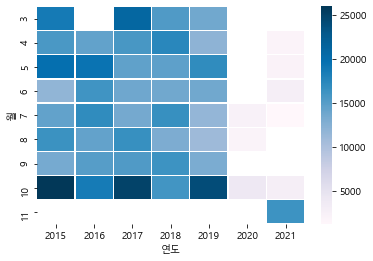

In [ ]:
heatmap_D_row = D_home_nan_month.loc[:, ['월', '연도', '관중']]

heatmap_D = pd.pivot_table(heatmap_D_row,
              index='월',
               columns='연도',
               values='관중',
               aggfunc=np.mean,
               )


sns.heatmap(heatmap_D, cmap='PuBu', linewidths=0.3)

**LG 홈경기 기준(정규시즌) 연도별 * 월별에 따른 관중수 히트맵**  

시즌 시작일: 2015시즌 3월 28일 / 2016시즌 4월 1일 / 2017시즌 3월 31일 / 2018시즌 3월 24일 / 2019시즌 3월 23일 / 2020시즌 5월 5일 / 2011시즌 4월 3일 
  
20~21년 코로나로 인해 무관중 경기 존재함

<AxesSubplot:xlabel='연도', ylabel='월'>

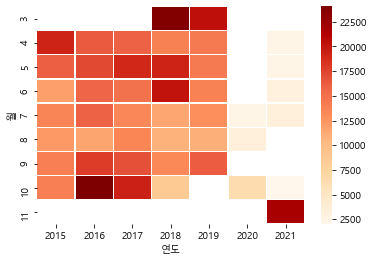

In [ ]:
heatmap_L_row = L_home_nan_month.loc[:, ['월', '연도', '관중']]

heatmap_L = pd.pivot_table(heatmap_L_row,
              index='월',
               columns='연도',
               values='관중',
               aggfunc=np.mean,
               )

sns.heatmap(heatmap_L, cmap='OrRd', linewidths=0.3)

## 잠실에서의 우천경기시 평균관중수 (팬 충성도 측정): LG 관중수 > 두산의 관중수 T / F

In [ ]:
import warnings

with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    df_row = pd.read_excel('./rain.xlsx', engine="openpyxl", header=2)
    
df_rain_row = df_row.drop(labels=[1007, 1008, 1009], axis=0)

# 날씨: 구름조금, 맑음, 비, 구름많음, 흐림
df_rain = df_rain_row[df_rain_row['날씨']=='비']
df_rain

,단체,리그,시즌,연도,월,일,요일,홈팀,원정팀,경기장,날씨,평균기온,관중수
7,KBO,정규리그,2021 시즌,2021.0,10.0,19.0,화,LG,키움히어로즈,서울 잠실 야구장,비,15℃,1624.0
15,KBO,정규리그,2021 시즌,2021.0,10.0,11.0,월,LG,KT,서울 잠실 야구장,비,17.8℃,0.0
16,KBO,정규리그,2021 시즌,2021.0,10.0,9.0,토,LG,KT,서울 잠실 야구장,비,24.1℃,0.0
17,KBO,정규리그,2021 시즌,2021.0,10.0,8.0,금,두산,롯데,서울 잠실 야구장,비,20℃,0.0
18,KBO,정규리그,2021 시즌,2021.0,10.0,7.0,목,두산,롯데,서울 잠실 야구장,비,21.9℃,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,KBO,정규리그,2015 시즌,2015.0,4.0,15.0,수,LG,KIA,서울 잠실 야구장,비,17℃,21750.0
1000,KBO,정규리그,2015 시즌,2015.0,4.0,5.0,일,LG,삼성,서울 잠실 야구장,비,12.2℃,17472.0
1002,KBO,정규리그,2015 시즌,2015.0,4.0,3.0,금,LG,삼성,서울 잠실 야구장,비,15.1℃,13625.0
1003,KBO,정규리그,2015 시즌,2015.0,4.0,1.0,수,LG,롯데,서울 잠실 야구장,비,17.6℃,14260.0


In [ ]:
# 홈팀 
df_D_rain = df_rain[df_rain['홈팀']=='두산']
df_L_rain = df_rain[df_rain['홈팀']=='LG']

**4번 조건 검정 잠실에서의 우천경기시 평균관중수 T/F**  

연도별로 돌아가며 각 팀 관중수 집계 (이미 홈 (잠실) 정규시즌 조건이 적용)

In [ ]:
df_rain_audience = pd.DataFrame(index = range(2015,2022),columns = ['두산 우천관중','LG 우천관중'])
j = 0
for i in range(2015,2022):
    df_rain_audience.iloc[j]['두산 우천관중'] = round(sum(df_D_rain[df_D_rain['연도']==i]['관중수']) / len(df_D_rain[df_D_rain['연도']==i]['관중수']) , 0)
    df_rain_audience.iloc[j]['LG 우천관중'] = round(sum(df_L_rain[df_L_rain['연도']==i]['관중수']) / len(df_L_rain[df_L_rain['연도']==i]['관중수']), 0)  
    j = j + 1
    #print (i)b
df_rain_audience['주인여부'] = df_rain_audience['두산 우천관중'] < df_rain_audience['LG 우천관중']
df_rain_audience

,두산 우천관중,LG 우천관중,주인여부
2015,12233.0,13190.0,True
2016,16754.0,15392.0,False
2017,14085.0,14812.0,True
2018,15380.0,11869.0,False
2019,12705.0,12766.0,True
2020,723.0,315.0,False
2021,1468.0,1461.0,False


### 날씨에 따른 관중수 시각화 (히트맵)

In [ ]:
with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    df_weather_row = pd.read_excel('./weather.xlsx', engine="openpyxl", header=2)
    
df_weather = df_weather_row.drop(labels=[1007, 1008, 1009], axis=0)
df_weather = df_weather[df_weather['시즌']== '2015 시즌']
df_weather

df_rain_1 = df_weather[df_weather['날씨']=='비']
df_L_weather = df_weather[df_weather['홈팀']=='LG']
df_D_weather = df_weather[df_weather['홈팀']=='두산']

**2015시즌 LG, 두산의 우천경기 홈 관중수**

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='날짜', ylabel='관중수'>

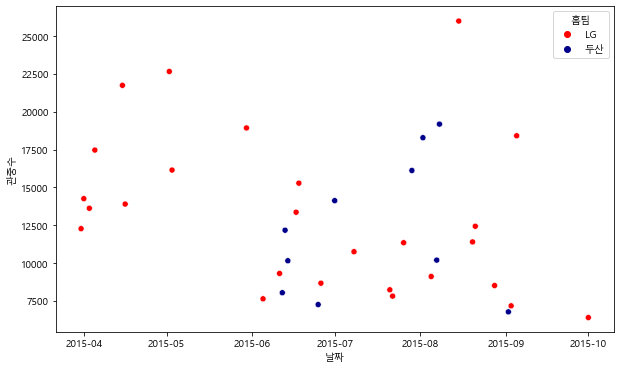

In [ ]:
plt.figure(figsize=(10, 6))
color_dict = dict({'LG':'red',
                  '두산':'darkblue'})
sns.scatterplot(df_rain_1['날짜'], df_rain_1['관중수'], hue= df_rain_1['홈팀'], palette=['red', 'darkblue'])

**2015시즌 LG, 두산의 날씨에 따른 관중 수**

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='날짜', ylabel='관중수'>

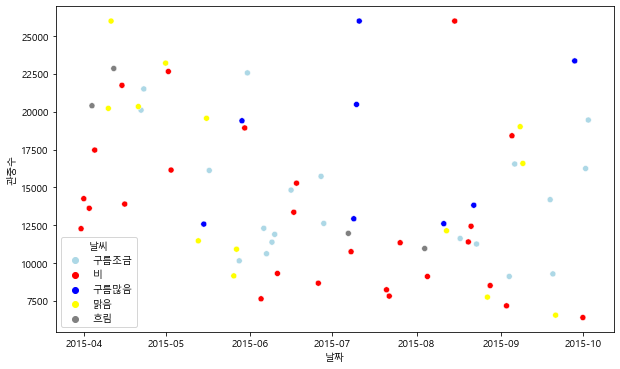

In [ ]:
plt.figure(figsize=(10, 6))
color_dict = dict({'구름조금':'lightblue',
                  '비':'red',
                    '구름많음':'blue',
                    '맑음': 'yellow',
                    '흐림': 'gray'})
sns.scatterplot(df_L_weather['날짜'], df_L_weather['관중수'], hue= df_L_weather['날씨'], palette=['lightblue', 'red', 'blue', 'yellow', 'gray'], legend='full')

## 올스타 맴버 수: LG > 두산

In [ ]:
#2015-2021시즌 올스타 row data create
allstar_row = pd.read_csv('./allstars15211(1).csv', encoding='cp949')
allstar_row

,년도,구분,선발투수,구원투수,마무리투수,포수,1루수,2루수,3루수,유격수,외야수1,외야수2,외야수3,지명타자,최다구단
0,2015,드림,김광현(SK),정우람(SK),임창용(삼성),강민호(롯데),구자욱(삼성),나바로(삼성),황재균(롯데),김상수(삼성),최형우(삼성),김현수(두산),민병헌(두산),★이승엽(삼성),삼성 : 6
1,2015,나눔,양현종(KIA),박정진(한화),권 혁(한화),김태군(NC),테임즈(NC),정근우(한화),김민성(넥센),김하성(넥센),이용규(한화),김주찬(KIA),유한준(넥센),이호준(NC),한화 : 4
2,2016,드림,니퍼트(두산),정재훈(두산),이현승(두산),양의지(두산),구자욱(삼성),오재원(두산),허경민(두산),김재호(두산),민병헌(두산),최형우(삼성),김문호(롯데),이승엽(삼성),두산 : 8
3,2016,나눔,신재영(넥센),송창식(한화),정우람(한화),박동원(넥센),테임즈(NC),정근우(한화),박석민(NC),김하성(넥센),★이용규(한화),나성범(NC),김주찬(KIA),로사리오(한화),한화 : 5
4,2017,드림,니퍼트(두산),이현승(두산),김재윤(KT),양의지(두산),이대호(롯데),최주환(두산),최 정(SK),김재호(두산),민병헌(두산),손아섭(롯데),구자욱(삼성),이승엽(삼성),두산 : 6
5,2017,나눔,양현종(KIA),김윤동(KIA),임창민(NC),김민식(KIA),로사리오(한화),안치홍(KIA),이범호(KIA),김선빈(KIA),이정후(넥센),★최형우(KIA),버나디나(KIA),김태균(한화),KIA : 8
6,2018,드림,린드블럼(두산),박치국(두산),함덕주(두산),★양의지(두산),이대호(롯데),오재원(두산),최 정(SK),김재호(두산),김재환(두산),박건우(두산),손아섭(롯데),최주환(두산),두산 : 9
7,2018,나눔,소 사(LG),서 균(한화),정우람(한화),유강남(LG),박병호(넥센),안치홍(KIA),송광민(한화),오지환(LG),★김현수(LG),이형종(LG),호 잉(한화),박용택(LG),LG : 6
8,2019,드림,김광현(SK),김태훈(SK),하재훈(SK),강민호(삼성),로 맥(SK),김상수(삼성),최 정(SK),김재호(두산),강백호(KT),구자욱(삼성),고종욱(SK),페르난데스(두산),SK :6
9,2019,나눔,윌 슨(LG),정우영(LG),고우석(LG),양의지(NC),박병호(키움),박민우(NC),김민성(LG),김하성(키움),김현수(LG),이정후(키움),이천웅(LG),이형종(LG),LG: 7


**5번 조건 검정 올스타 맴버 수 T/F**

In [ ]:
allstar = pd.read_csv('./allstar.CSV', encoding='cp949')
allstar

,연도,LG 멤버수,두산 멤버수,주인여부
0,2015,0,2,False
1,2016,0,8,False
2,2017,0,6,False
3,2018,6,9,False
4,2019,7,2,True
5,2020,2,2,False
6,2021,7,0,True


### 올스타 시각화 (line plot)

In [ ]:
# LG올스타
x1 = allstar["연도"]
y1 = allstar["LG 멤버수"]

# 두산올스타
x2 = allstar["연도"]
y2 = allstar["두산 멤버수"]

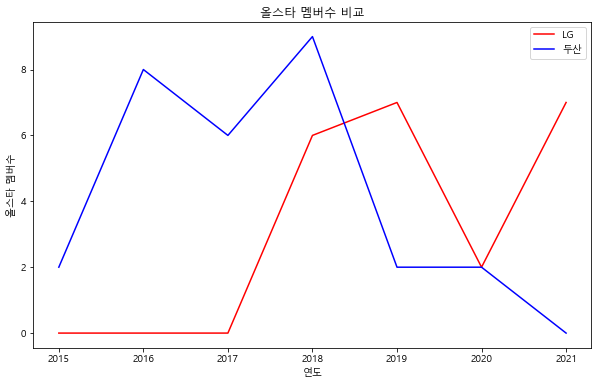

In [ ]:
plt.figure(figsize=(10, 6)) # 백도화지 크기 설정
plt.title('올스타 멤버수 비교') # 제목설정
plt.plot(x1, y1, 'r', label='LG') # 그래프 정의 label로 별명 설정
plt.plot(x2, y2, 'b', label='두산') # 그래프 정의
plt.xlabel('연도') # x축 설명
plt.ylabel('올스타 멤버수') # y축 설명
plt.legend() # 범례설정
plt.show() # 그래프 도화지에 뿌리기

In [ ]:
#종합 결과 review
df_win_rate

,두산 홈 승률,LG 홈 승률,주인여부
2015,0.578125,0.467742,False
2016,0.666667,0.587302,False
2017,0.596774,0.578125,False
2018,0.6875,0.619048,False
2019,0.640625,0.587302,False
2020,0.596774,0.596774,False
2021,0.53125,0.590164,True


In [ ]:
df_DL_win

,두산 승,LG 승,주인여부
2015,8,8,False
2016,9,7,False
2017,9,6,False
2018,15,1,False
2019,10,6,False
2020,9,6,False
2021,9,7,False


In [ ]:
df_crowd_mean

,두산 홈 관중수,LG 홈 관중수,주인여부
2015,1120381.0,1040125.0,False
2016,1165020.0,1182646.0,True
2017,1094829.0,1134846.0,True
2018,1112093.0,1108677.0,False
2019,983474.0,1000400.0,True
2020,55047.0,41317.0,False
2021,163671.0,160337.0,False


In [ ]:
df_rain_audience

,두산 우천관중,LG 우천관중,주인여부
2015,12233.0,13190.0,True
2016,16754.0,15392.0,False
2017,14085.0,14812.0,True
2018,15380.0,11869.0,False
2019,12705.0,12766.0,True
2020,723.0,315.0,False
2021,1468.0,1461.0,False


In [ ]:
allstar

,연도,LG 멤버수,두산 멤버수,주인여부
0,2015,0,2,False
1,2016,0,8,False
2,2017,0,6,False
3,2018,6,9,False
4,2019,7,2,True
5,2020,2,2,False
6,2021,7,0,True


# 결론: 2015년부터 현재까지 LG는 2019년 단 한 시즌 잠실의 주인이었다. 

# Reference

'두산' 검색결과, STATIZ, URL: http://old.statiz.co.kr/team.php?opt=0&sopt=1&year=2015&team=%EB%91%90%EC%82%B0  
'LG' 검색결과, STATIZ, URL: http://old.statiz.co.kr/team.php?opt=0&sopt=1&year=2015&team=LG
프로스포츠 정보광장, URL: http://data.prosports.or.kr/spectator/m0201/search  
'KBO 올스타전'검색결과, 나무위키, URL: https://namu.wiki/w/KBO%20%EC%98%AC%EC%8A%A4%ED%83%80%EC%A0%84  
'2019 프로야구 올스타전 베스트12 투표', 블로그명 <어짜고 저짜고 뭐라고>, URL: https://elwlsek.tistory.com/1402
